In [116]:
import os, json
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)

temp = pd.DataFrame()
files = []

path_to_json = 'StateTrailData' 

#json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(os.path.join(path_to_json,'*.json'))
    
dfs = []
for file in file_list:
    df = pd.read_json(file)
    dfs.append(df)
temp = pd.concat(dfs, ignore_index=False)
# temp.head()
temp['popularity']

0       35.2582
1       24.6457
2       24.5062
3       23.9546
4       20.5770
         ...   
1037     0.5695
1038     0.4952
1039     0.4356
1040     0.0000
1041     0.0000
Name: popularity, Length: 52557, dtype: float64

In [8]:
temp.size
temp.get(0)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
print(temp['features'].head(1))

0    [dogs-leash, forest, historic-site, river, vie...
Name: features, dtype: object


In [11]:
new_dataframe = temp.filter(['features'])
print(new_dataframe)

                                               features
0     [dogs-leash, forest, historic-site, river, vie...
1                     [dogs-leash, forest, kids, views]
2     [dogs-leash, forest, river, views, wild-flower...
3      [dogs-leash, forest, river, views, wild-flowers]
4     [dogs-leash, forest, river, views, wild-flower...
...                                                 ...
1037                   [dogs-leash, forest, lake, kids]
1038   [ada, dogs-leash, kids, paved, river, strollers]
1039  [city-walk, dogs-leash, paved, river, wild-flo...
1040      [rails-trails, ada, dogs, kids, paved, views]
1041                          [dogs-no, kids, wildlife]

[52557 rows x 1 columns]


In [12]:
length = len(new_dataframe)

middle_index = length // 2

first_half = new_dataframe[:middle_index]
second_half = new_dataframe[middle_index:]

print(first_half)
print(second_half)

                                               features
0     [dogs-leash, forest, historic-site, river, vie...
1                     [dogs-leash, forest, kids, views]
2     [dogs-leash, forest, river, views, wild-flower...
3      [dogs-leash, forest, river, views, wild-flowers]
4     [dogs-leash, forest, river, views, wild-flower...
...                                                 ...
8018                  [dogs-leash, views, wild-flowers]
8019                       [forest, lake, wild-flowers]
8020                                   [dogs-no, views]
8021                                [dogs-leash, views]
8022                              [forest, lake, views]

[26278 rows x 1 columns]
                                               features
8023  [dogs-leash, forest, lake, river, views, wild-...
8024                             [dogs-leash, wildlife]
8025  [city-walk, dogs-leash, kids, views, wild-flow...
8026                        [dogs-leash, forest, views]
8027       [dogs-no, h

In [13]:
import re

temp_arr=temp['features'].head(1)
temp_str = temp_arr.to_string()
temp_str = temp_str.split(",")

for a in temp_str:
    anew= a.replace("'", "")
    print(anew)
# split_df = pd.DataFrame(parks1['features'].tolist())
# split_df
#print(anew[3])
# temp_arr1= temp_str[0]
# print(temp_arr1)
# # stringregex = re.compile(r'[^\w\d_]+')
# match = stringregex.match(temp_arr1)
# print(match.group(0))


0    [dogs-leash
 forest
 historic-site
 river
 vie...


In [15]:
pd.set_option('display.max_colwidth', None)
temp_arr1= temp_str[0]
#temp_str1 = temp_arr1.to_string()
temp_arr1 = temp_arr1.split("[")
# print(temp_arr1)


array1 = temp.filter(['features'])
f_df = pd.DataFrame(array1)
f_df.head(25)


,features
0,"[dogs-leash, forest, historic-site, river, views, wild-flowers, wildlife]"
1,"[dogs-leash, forest, kids, views]"
2,"[dogs-leash, forest, river, views, wild-flowers, wildlife]"
3,"[dogs-leash, forest, river, views, wild-flowers]"
4,"[dogs-leash, forest, river, views, wild-flowers, wildlife]"
5,"[dogs-leash, forest, kids, river, views, wild-flowers, wildlife]"
6,"[dogs-leash, forest, kids, paved, river, views, waterfall]"
7,"[dogs-leash, forest, historic-site, kids, river, views, wild-flowers, wildlife]"
8,"[dogs-leash, forest, views, wild-flowers]"
9,"[dogs, forest, views, wild-flowers, wildlife]"


In [16]:
new_dataframe.to_csv('State_Features.csv')

In [33]:
# define dataset
features = pd.read_csv('State_Features.csv')
feat=pd.DataFrame(features)

In [36]:
feat.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,dogs-leash,forest,historic-site,river,views,wild-flowers,wildlife,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dogs-leash,forest,kids,views,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dogs-leash,forest,river,views,wild-flowers,wildlife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dogs-leash,forest,river,views,wild-flowers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dogs-leash,forest,river,views,wild-flowers,wildlife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# linear regression feature importance
import nltk
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
# features = pd.read_csv('Npark_features.csv')
# feat=pd.DataFrame(features)

top_N = 25
word_dist = nltk.FreqDist(feat['5'])
# print('All frequencies')
# print('='*60)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])

# print(rslt)
# print ('='*60)
feat.head()
for i in feat.columns:
    feat[i][feat[i] == 'dogs-no'] = 1
    feat[i][feat[i] == 'dogs-leash'] = 2
    feat[i][feat[i] == 'wildlife'] = 3.5
    feat[i][feat[i] == 'forest'] = 4.5
    feat[i][feat[i] == 'river'] = 7.5
    feat[i][feat[i] == 'views'] = 5
    feat[i][feat[i] == 'waterfall'] = 7
    feat[i][feat[i] == 'wild-flowers'] = 4
    feat[i][feat[i] == 'lake'] = 6.5
    feat[i][feat[i] == 'kids'] = 2.5
    feat[i][feat[i] == 'partially-paved'] = 3
    feat[i][feat[i] == 'beach'] = 6.5
    feat[i][feat[i] == 'ada'] = 1
    feat[i][feat[i] == 'cave'] = 6
    feat[i][feat[i] == 'dogs'] = 2
    feat[i][feat[i] == 'paved'] = 2.5
    feat[i][feat[i] == 'historic-site'] = 8
    feat[i][feat[i] == 'rails-trails'] = 1.5
    feat[i][feat[i] == 'city-walk'] = 0.5
    feat[i][feat[i] == 'hot-springs'] = 10
    feat[i][feat[i] == 'strollers'] = 0.5
    feat[i][feat[i] == 'NaN'] = 0

feat=feat.replace(np.nan,0)
feat['total'] = feat.sum(axis=1)
# print(feat['total'])
temp['features']=feat['total']
# feat.tail()
temp['features']
# parks.tail()
# feat.head()  
# i=0
# for f in feat['total']:
#     if(f==0):
#         print(i)
#     i=i+1
# # feat.Severity[feat.Severity == 'Moderate'] = 3
# feat.head()

/var/folders/cz/htc8sj7j2xl946wzt4fs5yw80000gn/T/ipykernel_15077/3580390894.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat[i][feat[i] == 'dogs-no'] = 1
/var/folders/cz/htc8sj7j2xl946wzt4fs5yw80000gn/T/ipykernel_15077/3580390894.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat[i][feat[i] == 'dogs-leash'] = 2
/var/folders/cz/htc8sj7j2xl946wzt4fs5yw80000gn/T/ipykernel_15077/3580390894.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

0       48.0
1       27.0
2       27.0
3       27.0
4       27.0
        ... 
1037    15.0
1038    24.0
1039     3.0
1040    39.0
1041    21.0
Name: features, Length: 52557, dtype: float64

In [40]:
array2 = temp.filter(['activities'])
f_df = pd.DataFrame(array2)
f_df.head(25)


,activities
0,"[birding, hiking, nature-trips, trail-running, walking]"
1,"[birding, hiking, nature-trips, trail-running]"
2,"[hiking, rock-climbing, walking]"
3,"[birding, hiking, mountain-biking, nature-trips, trail-running]"
4,"[hiking, mountain-biking]"
5,"[birding, hiking, nature-trips, road-biking, walking]"
6,"[camping, nature-trips, snowshoeing, walking, cross-country-skiing]"
7,"[hiking, walking]"
8,"[backpacking, birding, camping, hiking, nature-trips, walking]"
9,"[birding, hiking, nature-trips]"


In [43]:
new_dataframe1 = temp.filter(['activities'])
print(new_dataframe1)


                                                                        activities
0                          [birding, hiking, nature-trips, trail-running, walking]
1                                   [birding, hiking, nature-trips, trail-running]
2                                                 [hiking, rock-climbing, walking]
3                  [birding, hiking, mountain-biking, nature-trips, trail-running]
4                                                        [hiking, mountain-biking]
...                                                                            ...
1037                                                       [nature-trips, walking]
1038                                [fishing, road-biking, trail-running, walking]
1039                                [birding, road-biking, trail-running, walking]
1040  [hiking, nature-trips, road-biking, walking, horseback-riding, rails-trails]
1041                                              [hiking, trail-running, walking]

[52

In [44]:
new_dataframe1.to_csv('State_Activities.csv')

In [49]:
# define dataset
activities = pd.read_csv('State_Activities.csv')
act=pd.DataFrame(activities)
act.tail()

/Users/mounicaayalasomayajula/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
52552,nature-trips,walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52553,fishing,road-biking,trail-running,walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52554,birding,road-biking,trail-running,walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52555,hiking,nature-trips,road-biking,walking,horseback-riding,rails-trails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52556,hiking,trail-running,walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
top_N = 25
word_dist = nltk.FreqDist(act['6'])
print('All frequencies')
print('='*60)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])

print(rslt)
print ('='*60)
act.head()
for i in act.columns:
    act[i][act[i] == 'birding'] = 10
    act[i][act[i] == 'NaN'] = 0
    act[i][act[i] == 'backpacking'] = 20
    act[i][act[i] == 'hiking'] = 65
    act[i][act[i] == 'camping'] = 65
    act[i][act[i] == 'nature-trips'] = 80
    act[i][act[i] == 'off-road-driving'] = 50
    act[i][act[i] == 'fishing'] = 40
    act[i][act[i] == 'road-biking'] = 40
    act[i][act[i] == 'mountain-biking'] = 40
    act[i][act[i] == 'scenic-driving'] = 65
    act[i][act[i] == 'walking'] = 60
    act[i][act[i] == 'bike-touring'] = 50
    act[i][act[i] == 'snowshoeing'] = 40
    act[i][act[i] == 'paddle-sports'] = 40
    act[i][act[i] == 'sea-kayaking'] = 40
    act[i][act[i] == 'fly-fishing'] = 30
    act[i][act[i] == 'trail-running'] = 20
    act[i][act[i] == 'horseback-riding'] = 60
    act[i][act[i] == 'rock-climbing'] = 60
    act[i][act[i] == 'cross-country-skiing'] = 45
    act[i][act[i] == 'skiing'] = 40
    act[i][act[i] == 'canoeing'] = 30
    act[i][act[i] == 'whitewater-kayaking'] = 70
    act[i][act[i] == 'snowboarding'] = 45
    act[i][act[i] == 'ice-climbing'] = 25
    act[i][act[i] == 'surfing'] = 35
    act[i][act[i] == 'rails-trails'] = 15
    
act=act.replace(np.nan,0)
act['total'] = act[act.columns].sum(axis=1)
# print(act)
temp['activities']=act['total']
# act.tail()
temp.tail()
# # act.head()  


All frequencies
    Word  Frequency
0      0      43396
1     60       5187
2     20       1745
3     40        746
4     45        452
5     80        449
6     30        293
7     15        143
8     65         57
9     70         52
10    50         17
11    25         11
12    35          9


/var/folders/cz/htc8sj7j2xl946wzt4fs5yw80000gn/T/ipykernel_15077/1387208085.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act[i][act[i] == 'birding'] = 10
/var/folders/cz/htc8sj7j2xl946wzt4fs5yw80000gn/T/ipykernel_15077/1387208085.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act[i][act[i] == 'NaN'] = 0
/var/folders/cz/htc8sj7j2xl946wzt4fs5yw80000gn/T/ipykernel_15077/1387208085.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

/var/folders/cz/htc8sj7j2xl946wzt4fs5yw80000gn/T/ipykernel_15077/1387208085.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  act['total'] = act[act.columns].sum(axis=1)


,objectID,ID,slug,name,popularity,type,_geoloc,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,area_id,area_name,country_id,country_name,city_id,city_name,state_id,state_name,verified_map_id,features,activities,feature_names,activity_names,overview,num_reviews,units,area_slug,trail_id,city_url,park_slug,profile_photo_url
1037,trail-10404921,10404921,us/ohio/sassafras-trail-lake-alma,Sassafras Trail,0.5695,trail,"{'lat': 39.14655, 'lng': -82.50908}",1931.208,84.7344,1,O,2,0.0,10113734.0,Lake Alma State Park,313,United States,3406,Hamden,36,Ohio,23410835.0,15.0,775,"[Dogs Leash, Forest, Lake, Kid Friendly]","[Nature Trips, Walking]",NaN,0,i,parks/us/ohio/lake-alma-state-park,10404921,us/ohio/hamden,us/ohio/lake-alma-state-park,None
1038,trail-10458098,10458098,us/ohio/the-rivers-edge-trail,The River's Edge Trail,0.4952,trail,"{'lat': 40.14664, 'lng': -84.23887}",5310.822,10.9728,1,P,2,0.0,10170387.0,Linear Park,313,United States,25758,Piqua,36,Ohio,24656627.0,24.0,775,"[Wheelchair Friendly, Dogs Leash, Kid Friendly, Paved, River, Stroller Friendly]","[Fishing, Road Biking, Running, Walking]",NaN,0,i,parks/us/ohio/linear-park--2,10458098,us/ohio/piqua,us/ohio/linear-park--2,None
1039,trail-10531397,10531397,us/ohio/middlebury-run-trail,Middlebury Run Trail,0.4356,trail,"{'lat': 41.0596, 'lng': -81.47176}",2253.076,11.8872,1,O,2,5.0,10171514.0,Middlebury Run Park,313,United States,59,Akron,36,Ohio,28307252.0,3.0,500,"[City Walk, Dogs Leash, Paved, River, Wild Flowers]","[Bird Watching, Road Biking, Running, Walking]",NaN,1,i,parks/us/ohio/middlebury-run-park,10531397,us/ohio/akron,us/ohio/middlebury-run-park,None
1040,trail-10542742,10542742,us/ohio/the-heartland-trail,The Heartland Trail,0.0000,trail,"{'lat': 40.87184, 'lng': -81.74625}",9173.238,33.8328,1,O,2,0.0,NaN,,313,United States,24922,Orrville,36,Ohio,28921984.0,39.0,675,"[Rails Trails, Wheelchair Friendly, Dogs, Kid Friendly, Paved, Views]","[Hiking, Nature Trips, Road Biking, Walking, Horseback Riding]",NaN,0,i,,10542742,us/ohio/orrville,NaN,https://cdn-assets.alltrails.com/uploads/photo/image/23964303/large_0625f61c7820ebb12840b8313f9bc0ae.jpg
1041,trail-10545070,10545070,us/ohio/arrowhead-trail--2,Arrowhead Trail,0.0000,trail,"{'lat': 39.8938, 'lng': -82.80683}",3379.614,5.7912,1,O,0,4.0,NaN,,313,United States,1187,Canal Winchester,36,Ohio,28919821.0,21.0,1225,"[Dogs No, Kid Friendly, Wildlife]","[Hiking, Running, Walking]",NaN,7,i,,10545070,us/ohio/canal-winchester,NaN,None


In [131]:
# Create a copy to keep the original dataset
df_copy=temp.copy()

,length,elevation_gain,difficulty_rating,visitor_usage,features,activities
1037,1931.208,84.7344,1,1,10.0,310
1038,5310.822,10.9728,1,2,16.0,310
1039,2253.076,11.8872,1,1,2.0,200
1040,9173.238,33.8328,1,1,26.0,270
1041,3379.614,5.7912,1,,14.0,490


In [85]:
new_data = temp.filter(['visitor_usage'])
print(new_data)

     visitor_usage
0                3
1                2
2                3
3                3
4                3
...            ...
1037             1
1038             2
1039             1
1040             1
1041              

[52557 rows x 1 columns]


In [68]:
new_data.to_csv('State_Visitor.csv')

In [81]:
visit = pd.read_csv('State_Visitor.csv')
v=pd.DataFrame(visit)
v.tail()
# v.columns

,Unnamed: 0,visitor_usage
52552,1037,1
52553,1038,2
52554,1039,1
52555,1040,1
52556,1041,0


In [133]:
temp['visitor_usage']=v['visitor_usage']
temp.tail()

,objectID,ID,slug,name,popularity,type,_geoloc,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,area_id,area_name,country_id,country_name,city_id,city_name,state_id,state_name,verified_map_id,features,activities,feature_names,activity_names,overview,num_reviews,units,area_slug,trail_id,city_url,park_slug,profile_photo_url
1037,trail-10404921,10404921,us/ohio/sassafras-trail-lake-alma,Sassafras Trail,0.5695,trail,"{'lat': 39.14655, 'lng': -82.50908}",1931.208,84.7344,1,O,2,0.0,10113734.0,Lake Alma State Park,313,United States,3406,Hamden,36,Ohio,23410835.0,15.0,775,"[Dogs Leash, Forest, Lake, Kid Friendly]","[Nature Trips, Walking]",NaN,0,i,parks/us/ohio/lake-alma-state-park,10404921,us/ohio/hamden,us/ohio/lake-alma-state-park,None
1038,trail-10458098,10458098,us/ohio/the-rivers-edge-trail,The River's Edge Trail,0.4952,trail,"{'lat': 40.14664, 'lng': -84.23887}",5310.822,10.9728,1,P,2,0.0,10170387.0,Linear Park,313,United States,25758,Piqua,36,Ohio,24656627.0,24.0,775,"[Wheelchair Friendly, Dogs Leash, Kid Friendly, Paved, River, Stroller Friendly]","[Fishing, Road Biking, Running, Walking]",NaN,0,i,parks/us/ohio/linear-park--2,10458098,us/ohio/piqua,us/ohio/linear-park--2,None
1039,trail-10531397,10531397,us/ohio/middlebury-run-trail,Middlebury Run Trail,0.4356,trail,"{'lat': 41.0596, 'lng': -81.47176}",2253.076,11.8872,1,O,2,5.0,10171514.0,Middlebury Run Park,313,United States,59,Akron,36,Ohio,28307252.0,3.0,500,"[City Walk, Dogs Leash, Paved, River, Wild Flowers]","[Bird Watching, Road Biking, Running, Walking]",NaN,1,i,parks/us/ohio/middlebury-run-park,10531397,us/ohio/akron,us/ohio/middlebury-run-park,None
1040,trail-10542742,10542742,us/ohio/the-heartland-trail,The Heartland Trail,0.0000,trail,"{'lat': 40.87184, 'lng': -81.74625}",9173.238,33.8328,1,O,2,0.0,NaN,,313,United States,24922,Orrville,36,Ohio,28921984.0,39.0,675,"[Rails Trails, Wheelchair Friendly, Dogs, Kid Friendly, Paved, Views]","[Hiking, Nature Trips, Road Biking, Walking, Horseback Riding]",NaN,0,i,,10542742,us/ohio/orrville,NaN,https://cdn-assets.alltrails.com/uploads/photo/image/23964303/large_0625f61c7820ebb12840b8313f9bc0ae.jpg
1041,trail-10545070,10545070,us/ohio/arrowhead-trail--2,Arrowhead Trail,0.0000,trail,"{'lat': 39.8938, 'lng': -82.80683}",3379.614,5.7912,1,O,0,4.0,NaN,,313,United States,1187,Canal Winchester,36,Ohio,28919821.0,21.0,1225,"[Dogs No, Kid Friendly, Wildlife]","[Hiking, Running, Walking]",NaN,7,i,,10545070,us/ohio/canal-winchester,NaN,None


In [137]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scale=StandardScaler()
max_scale=MinMaxScaler()

cols_list=['length','elevation_gain','difficulty_rating','visitor_usage','features','activities']

df3=temp.filter(cols_list)
# temp['features']
# df3.visitor_usage.fillna(value=0, inplace=True) 
# df3['features']
# Scale the data and check the head
# df3.columns
df3[cols_list]=scale.fit_transform(df3[cols_list])
# df3.head()

df3['Composite']=df3.sum(axis=1)
temp['composite']=df3['Composite']
df3.head()

,length,elevation_gain,difficulty_rating,visitor_usage,features,activities,Composite
0,-0.026550,0.095048,0.376348,1.796352,1.263629,-0.064933,3.439894
1,-0.092162,-0.068142,0.376348,0.537725,-0.102603,-0.948607,-0.297440
2,-0.103097,-0.181606,0.376348,1.796352,-0.102603,-0.506770,1.278625
3,-0.037485,0.076514,0.376348,1.796352,-0.102603,0.229625,2.338751
4,-0.098723,-0.171208,0.376348,1.796352,-0.102603,-0.801328,0.998838


<AxesSubplot:xlabel='Composite'>

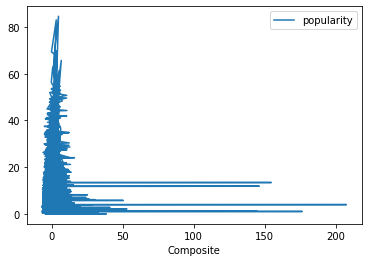

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

regr = LinearRegression()

x_feat = df3['Composite']
y_feat = temp['popularity']
regr.fit(np.array(x_feat).reshape(-1,1), y_feat)

df4 = df3[['Composite']].copy()
df4['popularity']=temp['popularity']
# df4.head()

df4.plot("Composite", "popularity")

<AxesSubplot:xlabel='Composite', ylabel='popularity'>

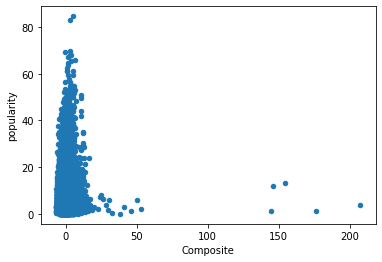

In [120]:
df4.plot.scatter("Composite", "popularity")

In [122]:
x_train, x_test, y_train, y_test = train_test_split(df4.Composite, df4.popularity, test_size = 0.2)
regr.fit(np.array(x_train).reshape(-1,1), y_train)
preds = regr.predict(np.array(x_test).reshape(-1,1))
y_test.head()

1880    2.2331
394     6.2238
4195    5.9871
166     7.3030
1987    9.9589
Name: popularity, dtype: float64

In [123]:
preds

array([6.98861957, 7.51121581, 6.16299261, ..., 6.1096987 , 5.92662298,
       7.28714198])

(array([1.000e+00, 3.000e+00, 6.000e+00, 3.000e+01, 7.000e+01, 4.120e+02,
        5.650e+03, 4.339e+03, 0.000e+00, 1.000e+00]),
 array([-77.67198304, -66.26008974, -54.84819643, -43.43630313,
        -32.02440983, -20.61251652,  -9.20062322,   2.21127008,
         13.62316339,  25.03505669,  36.44694999]),
 <BarContainer object of 10 artists>)

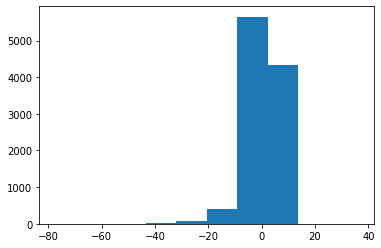

In [124]:
residuals = preds - y_test
plt.hist(residuals)

In [125]:
mean_squared_error(y_test, preds) ** 0.5

5.4427166114294

In [ ]:
# but this MSError is for a huge data for which popularity is 0. May be we need to calculate this considering 
# only rows with popularity > 0

In [138]:
temp.head()

,objectID,ID,slug,name,popularity,type,_geoloc,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,area_id,area_name,country_id,country_name,city_id,city_name,state_id,state_name,verified_map_id,features,activities,feature_names,activity_names,overview,num_reviews,units,area_slug,trail_id,city_url,park_slug,profile_photo_url,composite
0,trail-10261647,10261647,us/west-virginia/maryland-heights-trails,Maryland Heights Loop [CLOSED],35.2582,trail,"{'lat': 39.32422, 'lng': -77.73101}",9977.908,463.9056,3,L,3,4.5,10119993.0,Harpers Ferry National Historical Park,313,United States,3467,Harpers Ferry,49,West Virginia,19767243.0,48.0,775,"[Dogs Leash, Forest, Historic Site, River, Views, Wild Flowers, Wildlife]","[Bird Watching, Hiking, Nature Trips, Running, Walking]",NaN,886,i,parks/us/west-virginia/harpers-ferry-national-historical-park,10261647,us/west-virginia/harpers-ferry,us/west-virginia/harpers-ferry-national-historical-park,https://cdn-assets.alltrails.com/uploads/photo/image/11628140/large_efd8158d6f819c8b6139bac5784aa00e.jpg,3.439894
1,trail-10033663,10033663,us/west-virginia/seneca-rocks,Seneca Rocks Trail,24.6457,trail,"{'lat': 38.83396, 'lng': -79.37411}",5149.888,243.8400,3,O,2,4.5,10120002.0,Spruce Knob-Seneca Rocks National Recreation Area,313,United States,7395,Seneca Rocks,49,West Virginia,13354207.0,27.0,475,"[Dogs Leash, Forest, Kid Friendly, Views]","[Bird Watching, Hiking, Nature Trips, Running]",NaN,344,i,parks/us/west-virginia/spruce-knob-seneca-rocks-national-recreation-area,10033663,us/west-virginia/seneca-rocks,us/west-virginia/spruce-knob-seneca-rocks-national-recreation-area,https://cdn-assets.alltrails.com/uploads/photo/image/11349962/large_a3f29ee0ea1b4057a17cd9116ee72b08.jpg,-0.297440
2,trail-10241641,10241641,us/west-virginia/endless-wall,Endless Wall,24.5062,trail,"{'lat': 38.06296, 'lng': -81.05667}",4345.218,90.8304,3,L,3,4.5,10119995.0,New River Gorge National River,313,United States,4427,Lansing,49,West Virginia,18085503.0,27.0,625,"[Dogs Leash, Forest, River, Views, Wild Flowers, Wildlife]","[Hiking, Rock Climbing, Walking]",NaN,415,i,parks/us/west-virginia/new-river-gorge-national-river,10241641,us/west-virginia/lansing,us/west-virginia/new-river-gorge-national-river,https://cdn-assets.alltrails.com/uploads/photo/image/19286291/large_d28894a2fe1e92ae291ae76f2e024b45.jpg,1.278625
3,trail-10009569,10009569,us/west-virginia/loudoun-heights-trail-to-split-rock,Loudoun Heights Trail to Split Rock,23.9546,trail,"{'lat': 39.32168, 'lng': -77.74294}",9173.238,438.9120,3,L,3,4.5,10119993.0,Harpers Ferry National Historical Park,313,United States,3467,Harpers Ferry,49,West Virginia,27143739.0,27.0,875,"[Dogs Leash, Forest, River, Views, Wild Flowers]","[Bird Watching, Hiking, Mountain Biking, Nature Trips, Running]",NaN,363,i,parks/us/west-virginia/harpers-ferry-national-historical-park,10009569,us/west-virginia/harpers-ferry,us/west-virginia/harpers-ferry-national-historical-park,https://cdn-assets.alltrails.com/uploads/photo/image/19286606/large_b6f373a511779f31b4e7164c06dd633a.jpg,2.338751
4,trail-10241634,10241634,us/west-virginia/long-point,Long Point Trail,20.5770,trail,"{'lat': 38.04186, 'lng': -81.07815}",4667.086,104.8512,3,O,3,4.5,10119995.0,New River Gorge National River,313,United States,2677,Fayetteville,49,West Virginia,13269854.0,27.0,525,"[Dogs Leash, Forest, River, Views, Wild Flowers, Wildlife]","[Hiking, Mountain Biking]",NaN,358,i,parks/us/west-virginia/new-river-gorge-national-river,10241634,us/west-virginia/fayetteville,us/west-virginia/new-river-gorge-national-river,https://cdn-assets.alltrails.com/uploads/photo/image/19620874/large_24d60c867e2d592b5f442dc86d3fbe82.jpg,0.998838


In [139]:
temp.to_csv('Sparks_with_numerics.csv')

In [140]:
df5=pd.DataFrame(temp['_geoloc'])
df5.to_csv('sparks_geo_loc.csv')

In [141]:
geo_loc = pd.read_csv('sparks_geo_loc.csv')
gl=pd.DataFrame(geo_loc)
# gl.columns
df6=temp.copy()
df6.drop('_geoloc', inplace=True, axis=1)
# df6.columns
# gl.columns
df6['lat']=gl['lat']
df6['lng']=gl['lng']
df6.head()
df6.to_csv('Sparks_final.csv')